In [37]:
# Import needed libraries

import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [38]:
# Specify starting and end periods with Datetime

start = datetime(2018,1,1)
end = datetime(2021,10,1)


In [39]:
# Get Apple's stock info

apple = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)

In [40]:
# Check the data

apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.248276
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.241096
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.432659
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.904381
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.748737


In [41]:
# Slice the Adjusted Closing prices we need 

aapl_close = apple['Adj Close']
aapl_close.head()

Date
2018-01-02    41.248276
2018-01-03    41.241096
2018-01-04    41.432659
2018-01-05    41.904381
2018-01-08    41.748737
Name: Adj Close, dtype: float64

In [42]:
# Calculate daily returns 

daily_returns = aapl_close.pct_change()
daily_returns.head()

Date
2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
Name: Adj Close, dtype: float64

In [43]:
# Check the volatility of Apple's daily returns

daily_volatility = daily_returns.std()
daily_volatility

0.02102911147824818

In [44]:
# just making the float a bit human readable ;) 

print(str(round(daily_volatility, 5) * 100) + '%')

2.103%


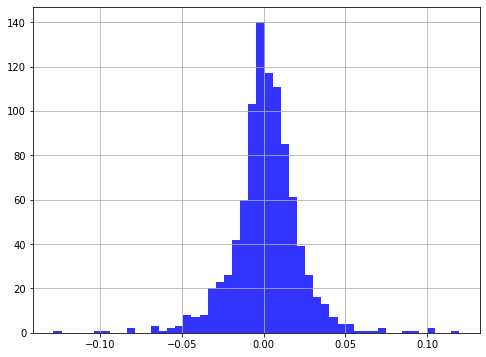

In [45]:
daily_returns.hist(bins=50, alpha=0.8, color='blue', figsize=(8,6));

In [46]:
# Let's have fun by comparing the volatility of three stocks. Pull Ajdusted closing prices for Apple, Fb and Tesla

assets = ['USO', 'AAPL', 'CPER']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Adj Close']
    
df.head()

,USO,AAPL,CPER
Date,,,
2018-01-02,96.559998,41.248280,20.920000
2018-01-03,98.720001,41.241093,20.809999
2018-01-04,98.959999,41.432652,20.780001
2018-01-05,98.480003,41.904385,20.620001
2018-01-08,99.040001,41.748741,20.639999


In [47]:
# Check the daily returns of the three companies

asset_returns_daily = df.pct_change()
asset_returns_daily.head()

,USO,AAPL,CPER
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.022370,-0.000174,-0.005258
2018-01-04,0.002431,0.004645,-0.001442
2018-01-05,-0.004850,0.011386,-0.007700
2018-01-08,0.005686,-0.003714,0.000970


In [48]:
# Check the volatility of the daily returns of the three companines

asset_volatility_daily = asset_returns_daily.std()
asset_volatility_daily

USO     0.028315
AAPL    0.021029
CPER    0.013514
dtype: float64

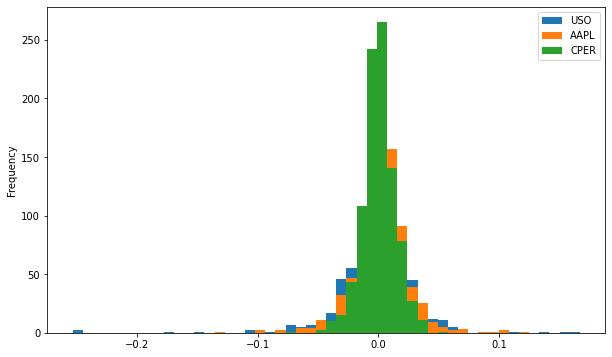

In [49]:
# Visualise the daily returns of the three companies stacked against each other. Notice the most/least volatile?

asset_returns_daily.plot.hist(bins=50, figsize=(10,6));

In [50]:
# As seen in the histogram, Tesla's daily returns are the most volatile with the biggest 'spreads'

asset_volatility_daily.max()

0.028315339113735658

In [51]:
# No surprise Apple's daily returns is the least volatile with such a small spread

asset_volatility_daily.min()

0.013514413574181167